<a href="https://colab.research.google.com/github/jiyeonbeackuq/data-tutoring-sparta5/blob/main/machine_learning_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) 필요한 라이브러리, 데이터  불러오기

In [ ]:
# 주피터 노트북으로 실행 시/ 코랩에서 데이터 마운트해서 사용할 해당 코드 삭제

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/data/')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/data'

In [ ]:
#!pip install xgboost
#!pip3 install xgboost

In [ ]:
!pip install scikit-learn==1.5.0
# !pip3 install scikit-learn==1.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 25.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
!pip show xgboost scikit-learn
#!pip3 show xgboost scikit-learn

Name: xgboost
Version: 2.1.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, nvidia-nccl-cu12, scipy
Required-by: 
---
Name: scikit-learn
Version: 1.5.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, sentence-transformers, shap, sklearn-compat, sklearn-pandas, yellowbrick


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import plot_tree

import joblib

In [ ]:
# MAPE 계산 함수 정의
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# 데이터 로드 및 DataFrame 생성
df = pd.read_csv('Boston-house-price-data.csv')
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

컬럼 이름	설명	데이터 타입
- CRIM	1인당 범죄율	float
- ZN	25,000평방피트 이상의 거주 구역 비율	float
- INDUS	비소매 상업 지역 비율	float
- CHAS	찰스강 인접 여부 (1: 인접, 0: 비인접)	int
- NOX	질소 산화물 농도 (10ppm 단위)	float
- RM	주택 1가구당 평균 방 개수	float
- AGE	1940년 이전에 건축된 자가 주택 비율	float
- DIS	5개 주요 보스턴 고용 센터까지의 가중 거리	float
- RAD	방사형 고속도로 접근성 지수	int
- TAX	10,000달러당 재산세율	float
- PTRATIO	마을별 학생-교사 비율	float
- B	1,000(Bk - 0.63)^2 (Bk: 마을별 흑인 인구 비율)	float
- LSTAT	저소득층 인구 비율 (%)	float
- MEDV	주택 가격 중앙값 (단위: 1,000달러) (종속 변수 - 타겟 값)	float

ㄴ MEDV 단위가 10,000달러 아니야?

# 2) EDA 및 데이터 시각화

In [ ]:

# -------------------------------
# 1. EDA 및 데이터 시각화
# -------------------------------
print("데이터프레임 정보:")
print(df.info())
print("\n데이터프레임 통계 요약:")
print(df.describe())
print("\n결측값 확인")
print(df.isna().sum())

데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

데이터프레임 통계 요약:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779 

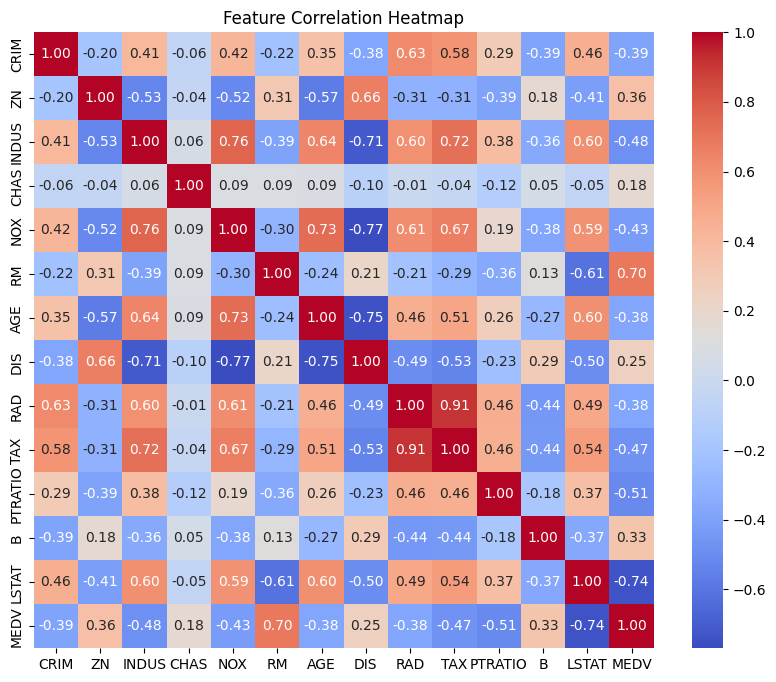

In [ ]:
# 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


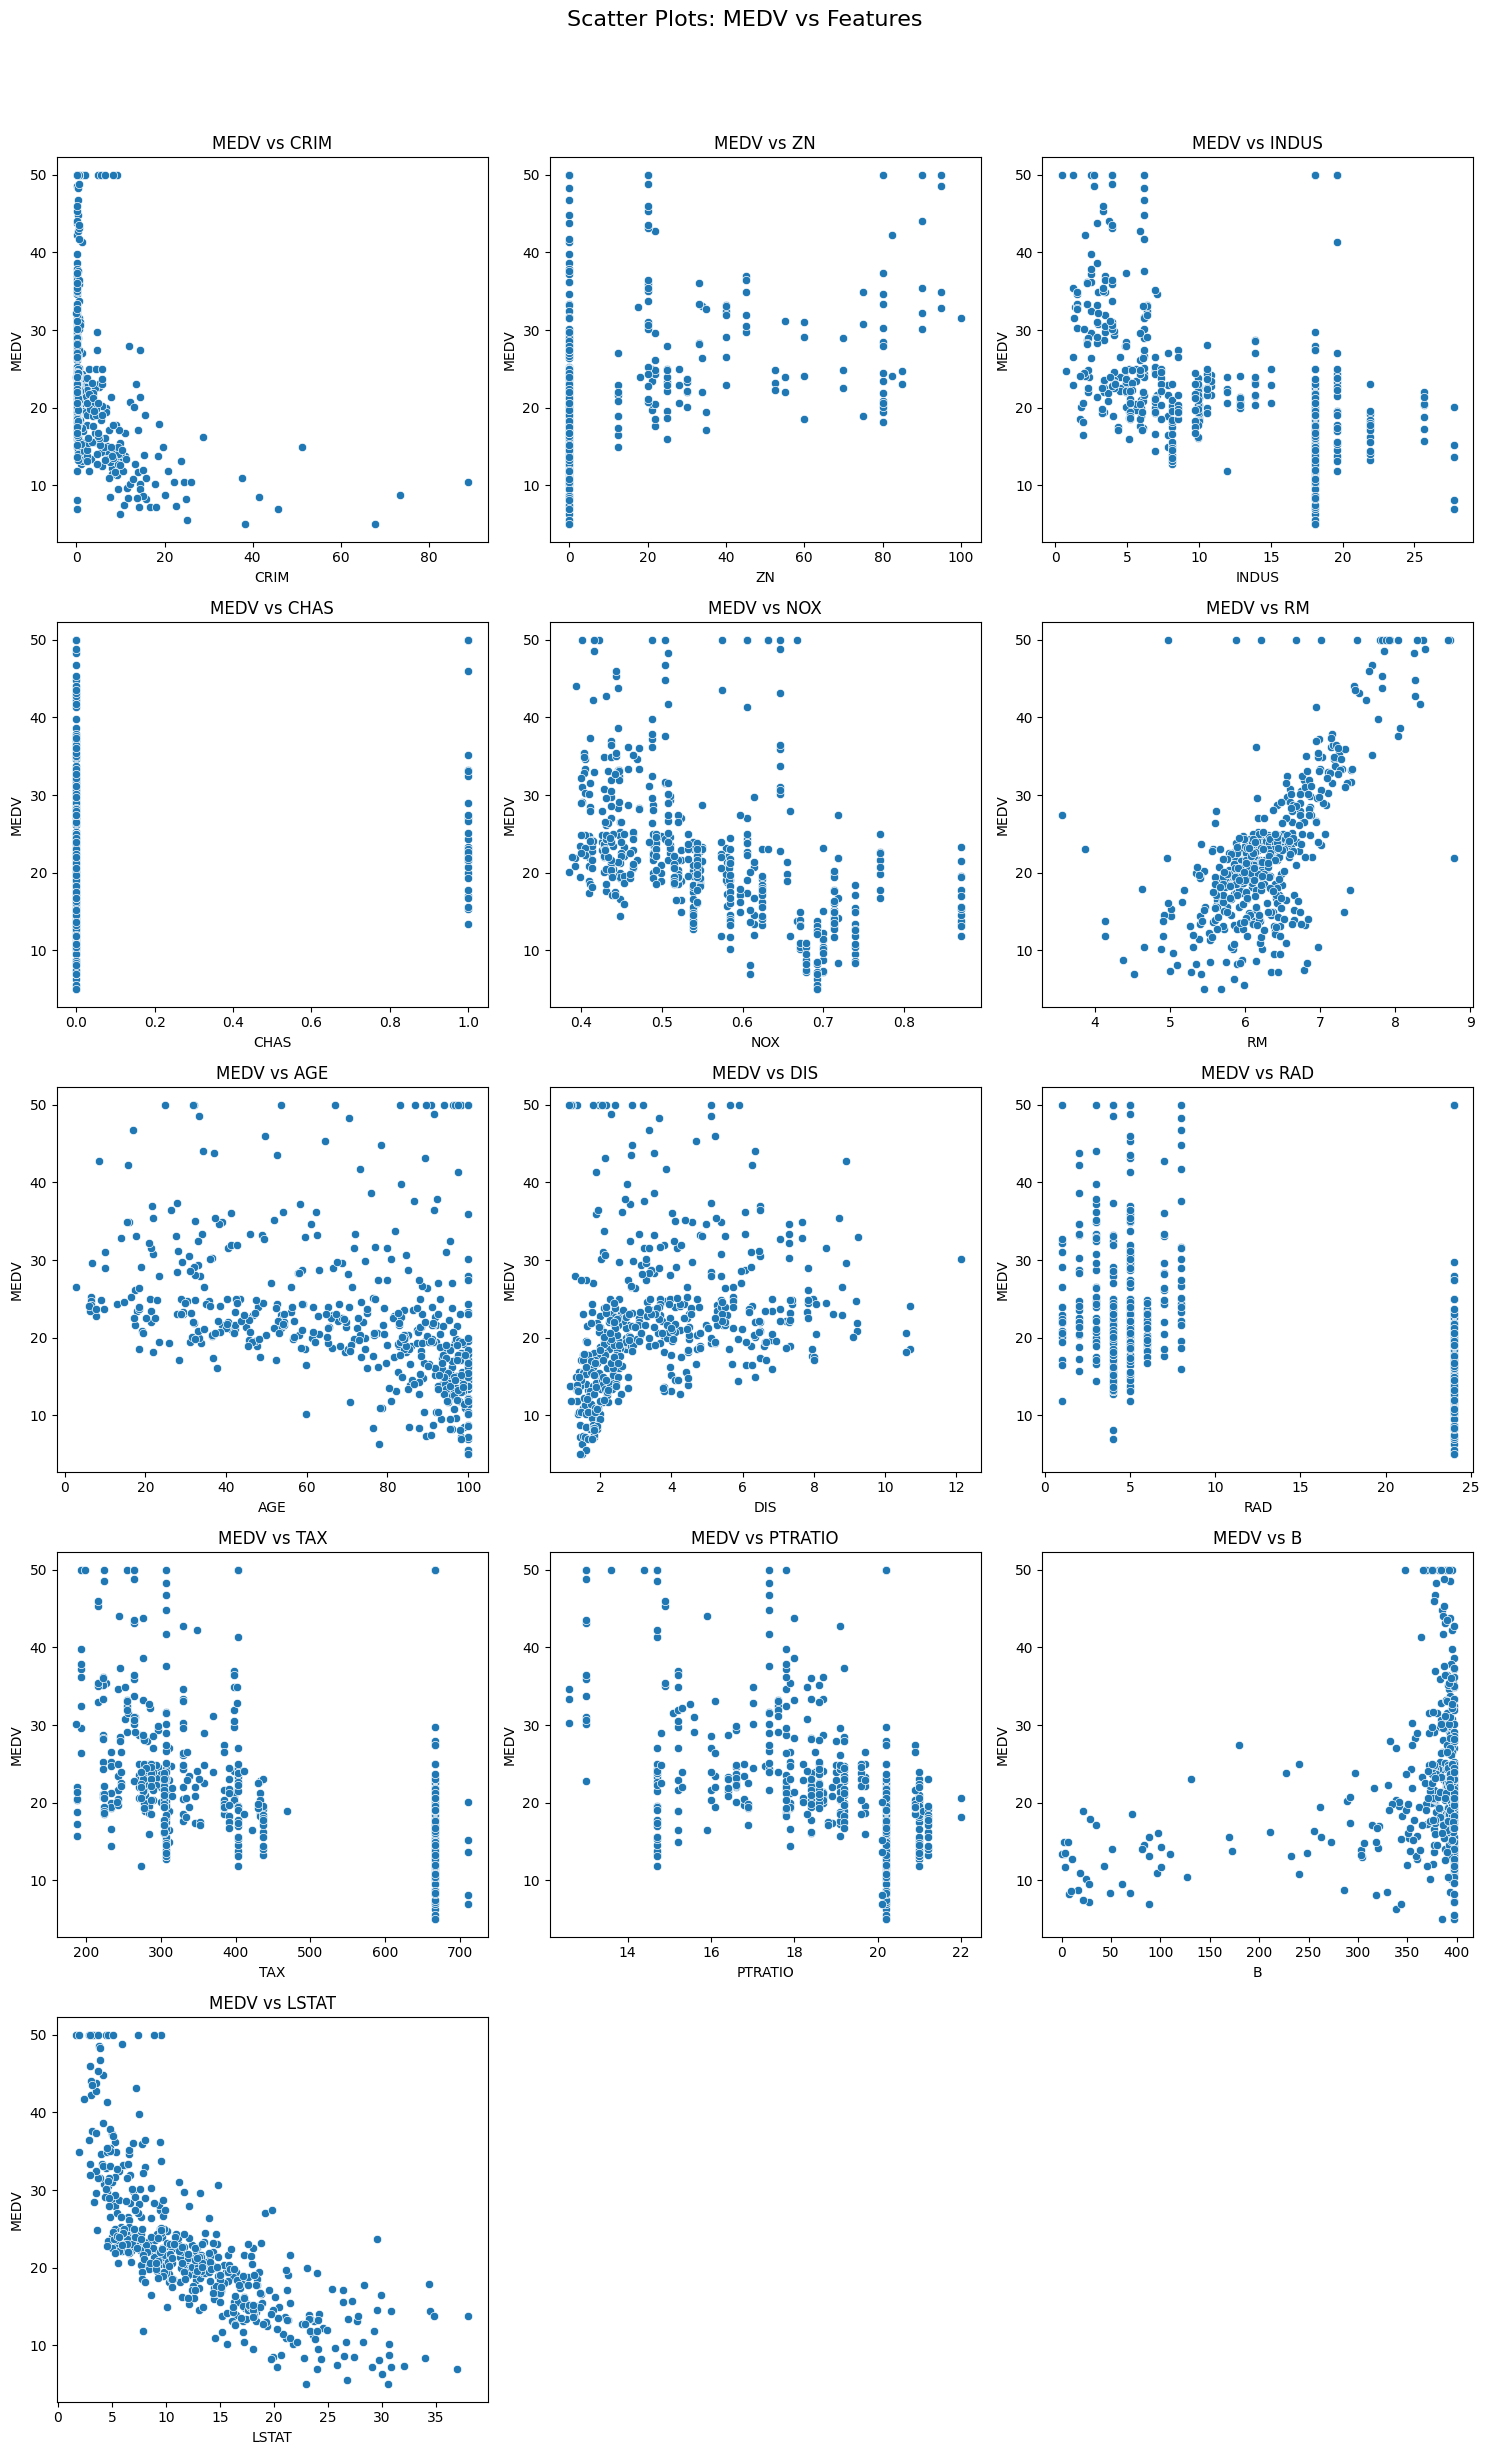

In [ ]:
# scatterplot

# Subplot 설정
num_features = len(df.columns) -1  # 독립 변수 개수
cols = 3  # 한 줄에 들어갈 플롯 수
rows = (num_features + cols - 1) // cols  # 행 개수 계산

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
fig.suptitle("Scatter Plots: MEDV vs Features", fontsize=16)

# 각 독립 변수와 MEDV의 산점도 그리기
for i, column in enumerate(df.columns[:-1]):
    ax = axes[i // cols, i % cols]
    sns.scatterplot(data=df, x=column, y="MEDV", ax=ax)
    ax.set_title(f"MEDV vs {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("MEDV")

# 빈 subplot 숨기기 (독립변수 개수가 subplot보다 적은 경우)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목과 간격 조정
plt.show()

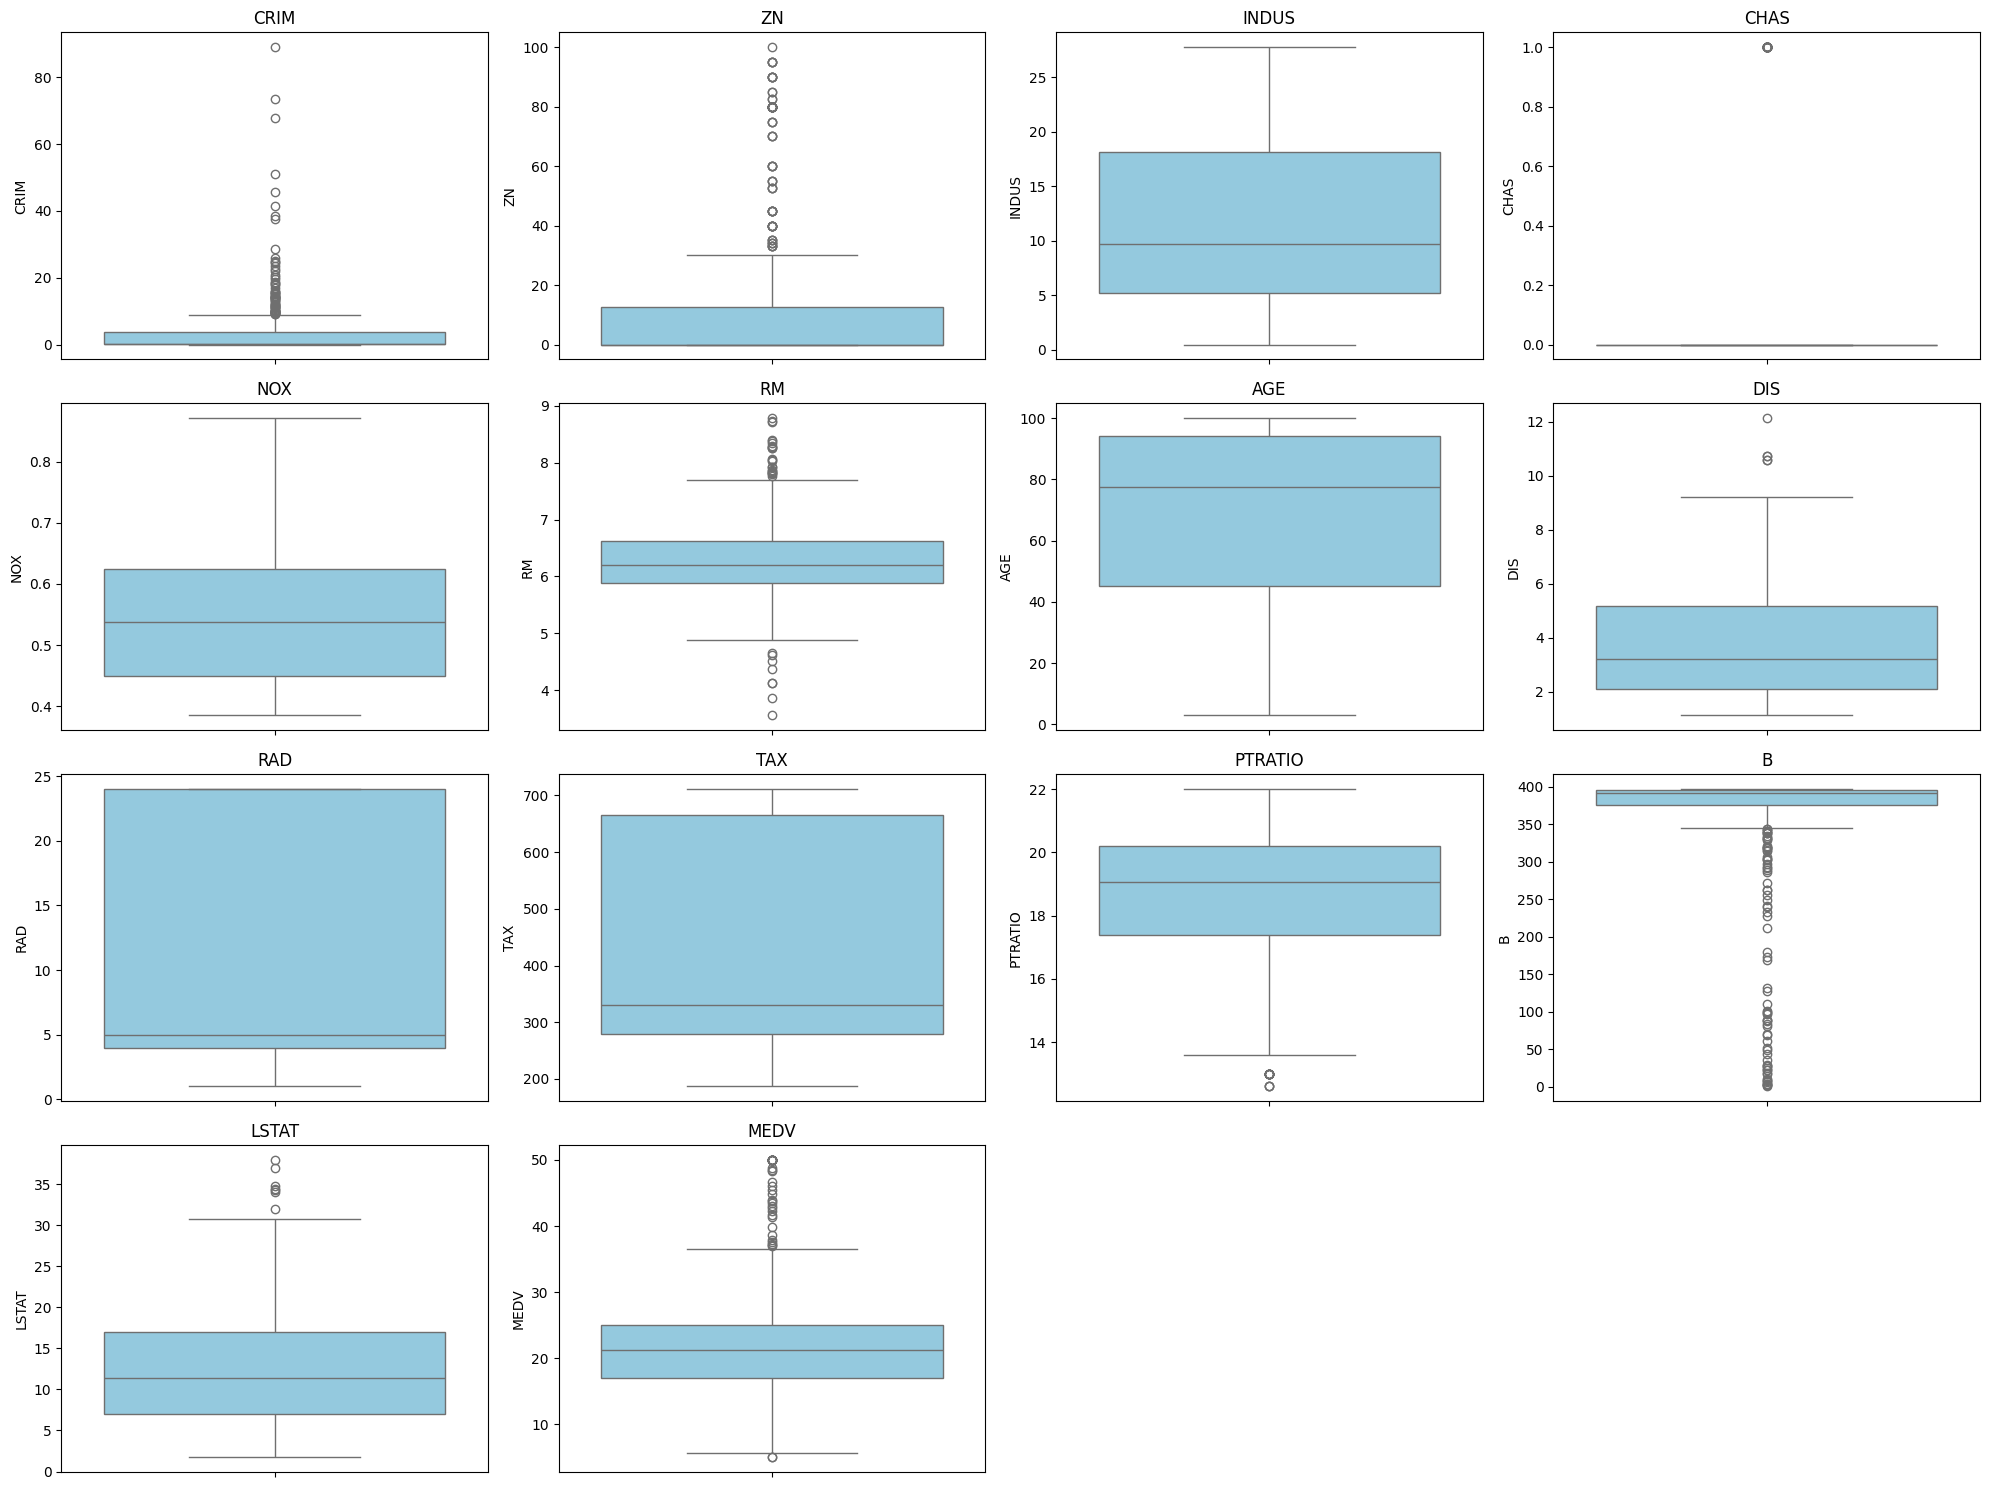

In [ ]:
# 각 feature에 대해 박스플롯 그리기

plt.figure(figsize=(20, 15))  # 전체 플롯 크기 설정
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)  # 4x4 subplot 생성
    sns.boxplot(y=df[column], color="skyblue")
    plt.title(column, fontsize=12)
    plt.tight_layout()  # 플롯 간격 조정

plt.show()

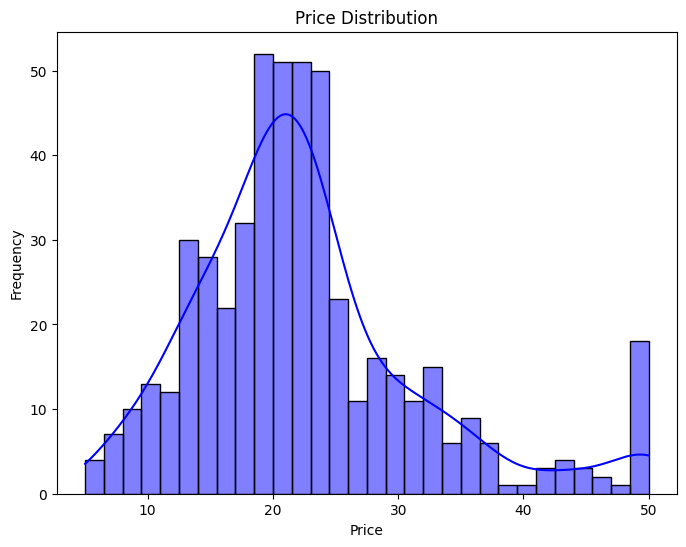

In [ ]:
# 가격 분포 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df['MEDV'], kde=True, bins=30, color="blue")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


# 3) 이상치 처리

In [ ]:
# -------------------------------
# 3. 이상치 처리
# -------------------------------

In [ ]:
from scipy.stats import zscore

# Z-score 계산
z_scores = np.abs(zscore(df.drop(columns = "CHAS")))  # 절댓값으로 변환하여 양수로 만듦
z_scores

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.419782,0.284830,1.287909,0.144217,0.413672,0.120013,0.140214,0.982843,0.666608,1.459000,0.441052,1.075562,0.159686
1,0.417339,0.487722,0.593381,0.740262,0.194274,0.367166,0.557160,0.867883,0.987329,0.303094,0.441052,0.492439,0.101524
2,0.417342,0.487722,0.593381,0.740262,1.282714,0.265812,0.557160,0.867883,0.987329,0.303094,0.396427,1.208727,1.324247
3,0.416750,0.487722,1.306878,0.835284,1.016303,0.809889,1.077737,0.752922,1.106115,0.113032,0.416163,1.361517,1.182758
4,0.412482,0.487722,1.306878,0.835284,1.228577,0.511180,1.077737,0.752922,1.106115,0.113032,0.441052,1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.413229,0.487722,0.115738,0.158124,0.439316,0.018673,0.625796,0.982843,0.803212,1.176466,0.387217,0.418147,0.014454
502,0.415249,0.487722,0.115738,0.158124,0.234548,0.288933,0.716639,0.982843,0.803212,1.176466,0.441052,0.500850,0.210362
503,0.413447,0.487722,0.115738,0.158124,0.984960,0.797449,0.773684,0.982843,0.803212,1.176466,0.441052,0.983048,0.148802
504,0.407764,0.487722,0.115738,0.158124,0.725672,0.736996,0.668437,0.982843,0.803212,1.176466,0.403225,0.865302,0.057989


In [ ]:

# 아웃라이어 임계값 설정 (|Z| > 3을 기준으로 아웃라이어 제거)
threshold = 3
outliers = (z_scores > threshold)

# 아웃라이어 제거
df_cleaned = df[(~outliers).all(axis=1)]  # 한 열이라도 아웃라이어면 해당 행 제거

# 제거 전/후 데이터 크기 비교
print(f"원본 데이터 크기: {df.shape}")
print(f"아웃라이어 제거 후 데이터 크기: {df_cleaned.shape}")

원본 데이터 크기: (506, 14)
아웃라이어 제거 후 데이터 크기: (448, 14)


In [ ]:
# IQR 기반 아웃라이어 확인
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print(f"{k} outliers = {perc:.2f}")

CRIM outliers = 13.04
ZN outliers = 13.44
INDUS outliers = 0.00
CHAS outliers = 100.00
NOX outliers = 0.00
RM outliers = 5.93
AGE outliers = 0.00
DIS outliers = 0.99
RAD outliers = 0.00
TAX outliers = 0.00
PTRATIO outliers = 2.96
B outliers = 15.22
LSTAT outliers = 1.38
MEDV outliers = 7.91


In [ ]:
# IQR 기반 아웃라이어 제거 함수 정의
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 1사분위수
    Q3 = data[column].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 3 * IQR  # 하한
    upper_bound = Q3 + 3 * IQR  # 상한
    # 아웃라이어가 아닌 데이터만 반환
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

print(f"아웃라이어 제거 전 데이터 크기: {df.shape}")

# 각 변수에 대해 아웃라이어 제거
for column in df.drop(columns = "CHAS").columns:
    df = remove_outliers_iqr(df, column)

# 결과 확인
print(f"아웃라이어 제거 후 데이터 크기: {df.shape}")

아웃라이어 제거 전 데이터 크기: (506, 14)
아웃라이어 제거 후 데이터 크기: (335, 14)


# 4) 데이터 인코딩

In [ ]:
# -------------------------------
# 4. 데이터 인코딩
# -------------------------------


In [ ]:
# CHAS 변수 더미 인코딩 (원핫 인코딩)

#  train 데이터셋과 test 데이터셋의 범주 개수가 다른 경우에, 원핫 인코딩 사용
# from sklearn.preprocessing import OneHotEncoder

chas_dummies = pd.get_dummies(df["CHAS"], prefix="CHAS", drop_first=False)  # 더미 인코딩

# 기존 데이터프레임에 더미 변수 추가 및 CHAS 열 제거
df2 = pd.concat([df, chas_dummies], axis=1).drop(columns=["CHAS"])


In [ ]:
df2

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,True,False
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,True,False
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,True,False
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,True,False
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,True,False
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,True,False
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,True,False
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,True,False


In [ ]:
df2["AGE"].describe()

,AGE
count,335.000000
mean,60.502388
std,27.753101
min,2.900000
25%,36.850000
50%,62.000000
75%,86.700000
max,100.000000


In [ ]:
# "AGE" 변수 카테고리화 (10%대 미만, 10%대, 20%대, 30%대, ... 90%대 이상)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # 경계값 설정
labels = ["10%대 미만", "10%대", "20%대", "30%대", "40%대", "50%대", "60%대", "70%대", "80%대", "90%대이상"]  # 카테고리 이름
df2["AGE_Group"] = pd.cut(df2["AGE"], bins=bins, labels=labels, right=True)
df2[["AGE","AGE_Group"]]

,AGE,AGE_Group
0,65.2,60%대
1,78.9,70%대
2,61.1,60%대
3,45.8,40%대
4,54.2,50%대
...,...,...
501,69.1,60%대
502,76.7,70%대
503,91.0,90%대이상
504,89.3,80%대


In [ ]:
# 라벨 인코딩
le = LabelEncoder()
df2["AGE_Group_Encoded"] = le.fit_transform(df2["AGE_Group"])

# 결과 확인
print(df2[["AGE", "AGE_Group", "AGE_Group_Encoded"]].head())

    AGE AGE_Group  AGE_Group_Encoded
0  65.2      60%대                  6
1  78.9      70%대                  7
2  61.1      60%대                  6
3  45.8      40%대                  4
4  54.2      50%대                  5


# 5) 데이터 분할

In [ ]:
# -------------------------------
# 5. 데이터 분할
# -------------------------------
X = df.drop(columns = "MEDV")
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6) 데이터 스케일링

In [ ]:
# -------------------------------
# 6. 데이터 스케일링
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
68,0.13554,12.5,6.07,0,0.409,5.594,36.8,6.4980,4,345.0,18.9,396.90,13.09
259,0.65665,20.0,3.97,0,0.647,6.842,100.0,2.0107,5,264.0,13.0,391.93,6.90
212,0.21719,0.0,10.59,1,0.489,5.807,53.8,3.6526,4,277.0,18.6,390.94,16.03
316,0.31827,0.0,9.90,0,0.544,5.914,83.2,3.9986,4,304.0,18.4,390.70,18.33
17,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307.0,21.0,386.75,14.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307.0,17.4,391.70,9.71
79,0.08387,0.0,12.83,0,0.437,5.874,36.6,4.5026,5,398.0,18.7,396.06,9.10
115,0.17134,0.0,10.01,0,0.547,5.928,88.2,2.4631,6,432.0,17.8,344.91,15.76
306,0.07503,33.0,2.18,0,0.472,7.420,71.9,3.0992,7,222.0,18.4,396.90,6.47


In [ ]:
X_train_scaled

array([[-0.35240694, -0.04748791, -0.37311695, ...,  0.44274088,
         0.72727989,  0.51032508],
       [ 0.66322355,  0.29340743, -0.73637155, ..., -2.29722733,
         0.24551072, -0.60799211],
       [-0.19327311, -0.61564681,  0.40874534, ...,  0.30342046,
         0.14954463,  1.04148058],
       ...,
       [-0.28263363, -0.61564681,  0.30841787, ..., -0.06810065,
        -4.31239397,  0.99270099],
       [-0.47033943,  0.8842927 , -1.04600286, ...,  0.21054018,
         0.72727989, -0.68567812],
       [-0.42003638, -0.61564681,  0.30841787, ..., -0.06810065,
         0.60029445, -0.01902377]])

# 7) 모델 학습 및 평가

In [ ]:
# -------------------------------
# 7. 모델 학습 및 평가
# -------------------------------

# 결과 저장을 위한 딕셔너리
results = {}


# 7-1) 선형 회귀

In [ ]:
# 1) 선형 회귀
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 성능 평가 지표 계산
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)

# 결과 출력
print("Linear Model Results")
print(f"MSE: {mse_linear:.4f}")
print(f"R2: {r2_linear:.4f}")
print(f"MAE: {mae_linear:.4f}")
print(f"MAPE: {mape_linear:.2f}%")

results["Linear Regression"] = {"MSE": mse_linear, "R2": r2_linear, "MAE": mae_linear, "MAPE": mape_linear, "Best Params": ""}

Linear Model Results
MSE: 10.4074
R2: 0.8052
MAE: 2.3232
MAPE: 9.38%


In [ ]:
# 회귀계수 및 절편 추출
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# 회귀계수를 데이터프레임으로 정리
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# 출력
print(f"Intercept (절편): {intercept:.2f}")
print("\nCoefficients (회귀계수):")
print(coef_df)

Intercept (절편): -10.23

Coefficients (회귀계수):
    Feature  Coefficient
5        RM     9.039238
0      CRIM     1.320788
3      CHAS     1.056982
8       RAD     0.208407
2     INDUS     0.022998
11        B     0.005973
1        ZN     0.002261
9       TAX    -0.012479
6       AGE    -0.041802
12    LSTAT    -0.100203
10  PTRATIO    -0.624629
7       DIS    -0.804104
4       NOX    -9.217550


In [ ]:
import statsmodels.api as sm

# 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# OLS 회귀 모델 학습
model = sm.OLS(y, X)  # OLS: Ordinary Least Squares
results_lr = model.fit()

# 회귀 결과 요약 출력
print(results_lr.summary())

# 회귀계수와 p-value 추출
coef_pval_df = pd.DataFrame({
    "Coefficient": round(results_lr.params,3),
    "P-value": round(results_lr.pvalues,3)
}).sort_values(by="P-value")

# 출력
print("\nCoefficients and P-values:")
print(coef_pval_df)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     151.7
Date:                Fri, 31 Jan 2025   Prob (F-statistic):          1.98e-128
Time:                        08:38:44   Log-Likelihood:                -845.24
No. Observations:                 335   AIC:                             1718.
Df Residuals:                     321   BIC:                             1772.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.7647      8.019     -1.218      0.2

# 7-2) 랜덤 포레스트

In [ ]:
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# 성능 평가 지표 계산
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# 결과 출력
print("RandomForest Results")
print(f"MSE: {mse_rf:.4f}")
print(f"R2: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"MAPE: {mape_rf:.2f}%")
print(f"Params: \n")
rf_model.get_params()

RandomForest Results
MSE: 7.1599
R2: 0.8660
MAE: 1.9531
MAPE: 7.85%
Params: 



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# 랜덤 포레스트 (GridSearchCV 사용)
# 랜덤 포레스트 하이퍼파라미터 설정
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

# 랜덤 포레스트 모델 초기화
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring="r2", n_jobs=-1)
rf_grid.fit(X_train, y_train)

# 최적 모델과 예측 결과 계산
best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# 성능 평가 지표 계산
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# 결과 출력
print("RandomForest Results")
print(f"MSE: {mse_rf:.4f}")
print(f"R2: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"MAPE: {mape_rf:.2f}%")
print(f"Best Params: {rf_grid.best_params_}")

results["Random Forest"] = {"MSE": mse_rf, "R2": r2_rf, "MAE": mae_rf, "MAPE": mape_rf, "Best Params": rf_grid.best_params_}

RandomForest Results
MSE: 7.5284
R2: 0.8591
MAE: 1.9933
MAPE: 7.99%
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


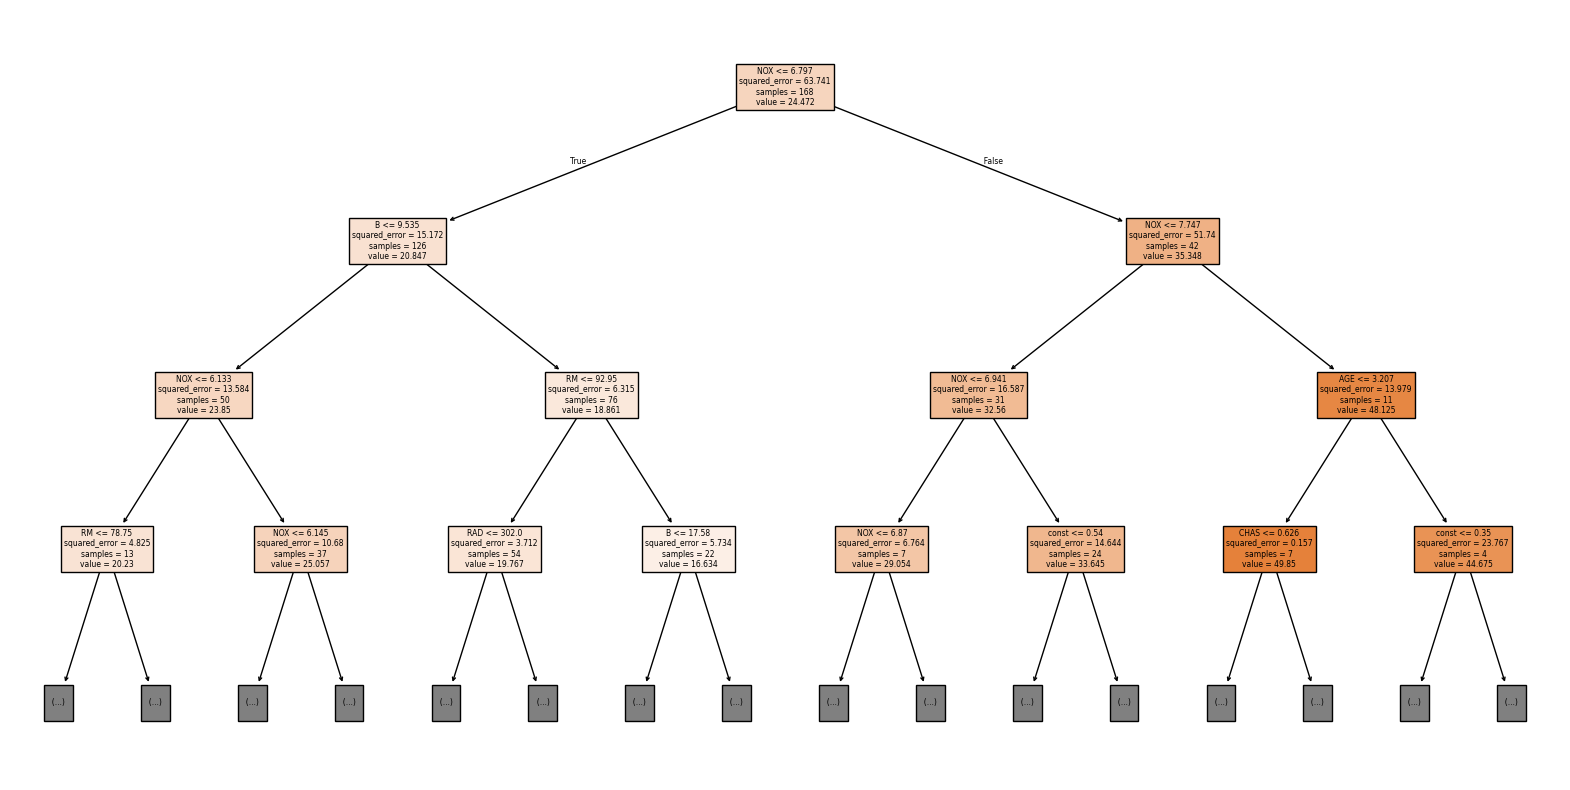

In [ ]:
# 첫 번째 트리 시각화
plt.figure(figsize=(20,10))
plot_tree(best_rf_model.estimators_[0], max_depth = 3, filled=True, feature_names=X.columns)
plt.show()

# 7-3) XGBoost

In [ ]:
# XGBoost 모델 초기화
xgb_model = XGBRegressor(random_state=42, eval_metric="rmse")

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# 성능 평가 지표 계산
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# 결과 출력
print("XGBoost Results")
print(f"MSE: {mse_xgb:.4f}")
print(f"R2: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"MAPE: {mape_xgb:.2f}%")
print(f"Params: \n")
xgb_model.get_params()

XGBoost Results
MSE: 8.4068
R2: 0.8427
MAE: 2.0456
MAPE: 8.13%
Params: 



{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'rmse',
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
# XGBoost (GridSearchCV 사용)

# XGBoost 하이퍼파라미터 설정
xgb_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 6]
}

# XGBoost 모델 초기화
xgb_model = XGBRegressor(random_state=42, eval_metric="rmse")

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring="r2", n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# 최적 모델과 예측 결과 계산
best_xgb_model = xgb_grid.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# 성능 평가 지표 계산
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# 결과 출력
print("XGBoost Results")
print(f"MSE: {mse_xgb:.4f}")
print(f"R2: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"MAPE: {mape_xgb:.2f}%")
print(f"Best Params: {xgb_grid.best_params_}")

results["XGBoost"] = {"MSE": mse_xgb, "R2": r2_xgb, "MAE": mae_xgb, "MAPE": mape_xgb, "Best Params": xgb_grid.best_params_}

XGBoost Results
MSE: 5.8138
R2: 0.8912
MAE: 1.7556
MAPE: 7.24%
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
best_xgb_model.feature_names_in_

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
best_xgb_model.feature_importances_

array([0.00457123, 0.00680018, 0.0069388 , 0.01445555, 0.03206864,
       0.6972496 , 0.02049127, 0.01276391, 0.01638941, 0.04751695,
       0.04139959, 0.00660903, 0.09274579], dtype=float32)

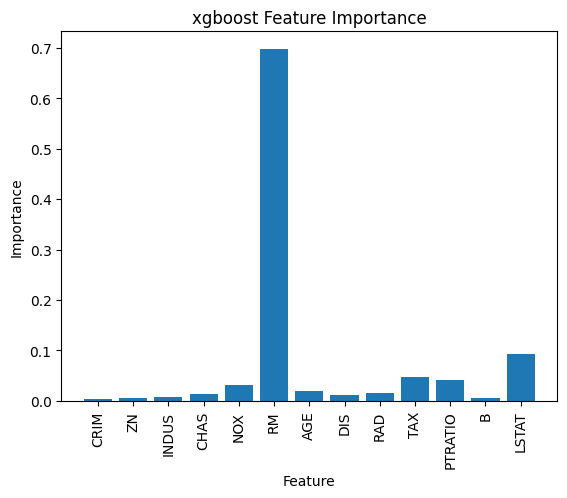

In [ ]:
# 중요도 시각화1
importance = best_xgb_model.feature_importances_
importance_df = pd.DataFrame({'Feature':best_xgb_model.feature_names_in_, 'Importance':importance})

plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('xgboost Feature Importance')
plt.xticks(rotation = 90)
plt.show()

<Figure size 1000x800 with 0 Axes>

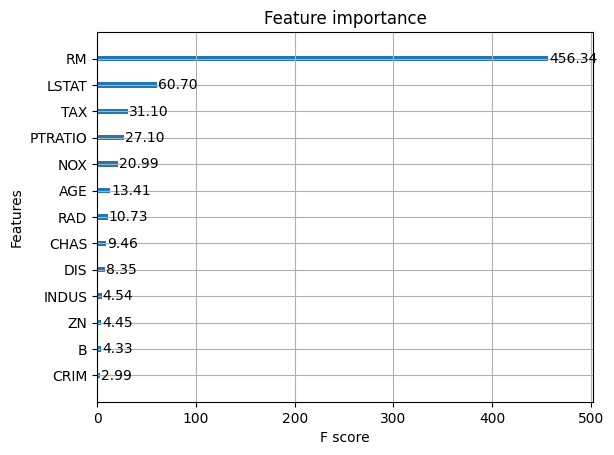

In [ ]:
# 중요도 시각화2
plt.figure(figsize=(10,8))
xgb.plot_importance(best_xgb_model, importance_type='gain', values_format = "{v:.2f}")  # feature importance
plt.show()

기본값: importance_type='weight'

- weight: 각 특성이 분할에 사용된 횟수. 이 값은 해당 특성이 모델에서 얼마나 자주 사용되었는지를 나타냄
- gain: 각 특성이 분할에서 얻은 평균적인 정보 이득. 즉, 해당 특성이 얼마나 중요한 분할을 만들었는지를 나타냄
- cover: 각 특성이 분할에서 차지하는 샘플 비율. 즉, 해당 특성이 모델에서 얼마나 많은 데이터를 처리했는지를 나타냄

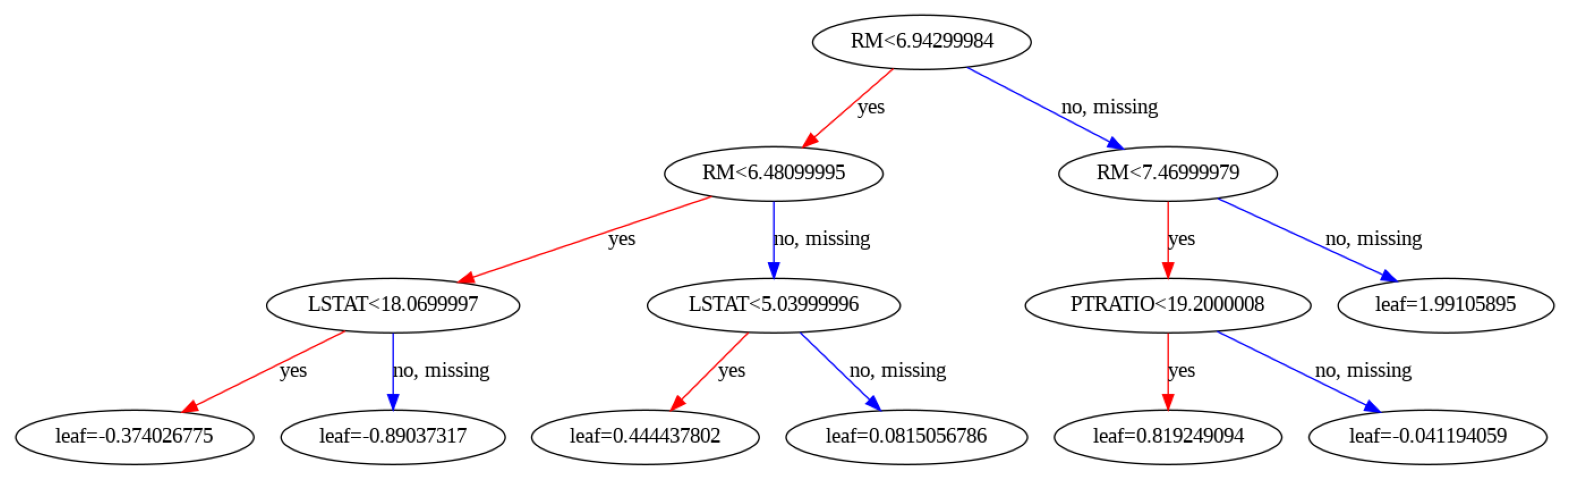

In [ ]:
# 첫 번째 트리 시각화
fig, ax = plt.subplots(figsize=(20, 10))
xgb.plot_tree(best_xgb_model, num_trees=0, dpi = 300, ax = ax)  # 0번째 트리 시각화
# plt.savefig('tree_visualization.png', dpi=300)
plt.show()

# 8) 결과 비교

In [ ]:
# -------------------------------
# 8. 결과 비교
# -------------------------------
print("\n모델별 성능 비교:")
for model, metrics in results.items():
    print(f"{model}: MSE= {metrics['MSE']:.2f}, MAPE={metrics['MAPE']:.2f}%, R2={metrics['R2']:.2f}")
    if "Best Params" in metrics:
        print(f"    Best Params: {metrics['Best Params']}")



모델별 성능 비교:
Linear Regression: MSE= 10.41, MAPE=9.38%, R2=0.81
    Best Params: 
Random Forest: MSE= 7.53, MAPE=7.99%, R2=0.86
    Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
XGBoost: MSE= 5.81, MAPE=7.24%, R2=0.89
    Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
results_df = pd.DataFrame(results).transpose()

# 긴 문자열이 잘리지 않도록 설정
pd.set_option('display.max_colwidth', None)
display(results_df)

,MSE,R2,MAE,MAPE,Best Params
Linear Regression,10.407398,0.805248,2.323192,9.383351,
Random Forest,7.528437,0.859121,1.993306,7.994204,"{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}"
XGBoost,5.813788,0.891207,1.75563,7.239828,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}"


# 9) 결과 해석

**1. MSE (Mean Squared Error):**
예측값과 실제값의 차이를 제곱한 후 평균을 구한 값.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

특징:

- 오차가 제곱되므로 큰 오차에 더 큰 패널티를 부여
- 단위가 종속 변수의 제곱 단위(예: 실제값이 "dollars"면 MSE는 "dollars²").

기준:

- 값이 작을수록 좋음.
- 데이터의 스케일과 목표에 따라 해석.

**2. MAE (Mean Absolute Error):**
예측값과 실제값의 차이의 절대값 평균.

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

특징:

- 오차의 절대값을 계산하므로 모든 오차에 동일한 중요도를 부여
- 단위는 종속 변수와 동일(예: 실제값이 "dollars"면 MAE도 "dollars").
- MSE보다 직관적이므로 평균 오차 크기를 바로 이해할 수 있음.

기준:

- 값이 작을수록 좋음.
- 데이터에 극단적인 아웃라이어가 많거나, MSE가 아웃라이어의 영향을 많이 받는 경우 MAE가 더 적합.
- 데이터의 스케일에 따라 결과를 해석해야 함


**3. MAPE (Mean Absolute Percentage Error):**

$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100
$$


**4. R² Score (Coefficient of Determination):**
예측값이 실제값을 얼마나 잘 설명하는지 나타내는 비율.

$$
\text{R^2} = 1 - \frac{RSS}{TSS}
$$

RSS (Residual Sum of Squares):

$$
\text{RSS} = \sum{(y_i - \hat{y}_i)^2}
$$

TSS (Total Sum of Squares):
$$
\text{TSS} = \sum{(y_i - \bar{y})^2}
$$

$$
y_i: 실제 값,
\hat{y}_i: 예측 값,
\bar{y}: 실제 값의 평균
$$

일반적으로
- 𝑅2 ≥ 0.6이면 "쓸만하다"고 평가.

- R 2가 0.8~0.9 이상이면 매우 높은 설명력을 가짐.

- R2가 너무 높으면 오히려 과적합을 의심해야 할 수도 있음.

- R2가 낮아도 MAE나 MSE가 작으면 모델이 여전히 유용할 수 있음(특히 데이터에 많은 노이즈가 있는 경우).

In [ ]:
# 평균값 예측하는 기준 모델과 비교

from sklearn.dummy import DummyRegressor

# 평균값을 예측하는 DummyRegressor 모델
dummy_model = DummyRegressor(strategy='mean')

# 모델 학습
dummy_model.fit(X_train, y_train)

# 예측
y_pred_dummy = dummy_model.predict(X_test)

# 성능 지표 계산
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
r2_dummy = r2_score(y_test, y_pred_dummy)

# 결과 출력
print("Dummy Model Performance (Predicting Mean Value)")
print(f"MSE: {mse_dummy:.4f}")
print(f"MAE: {mae_dummy:.4f}")
print(f"R2: {r2_dummy:.4f}")

Dummy Model Performance (Predicting Mean Value)
MSE: 53.4553
MAE: 5.2202
R2: -0.0003


## XGBoost 결과
* MSE:	5.813788
* R2: 0.891207
* MAE:	1.75563
* MAPE: 7.239828

* 모델이 **약 89%**의 분산을 설명한다.
* 실제값과 예측값은 평균 1,756달러 차이가 난다. (250만원)
* 예측이 실제 값과 평균적으로 약 7.24% 벗어난다

In [ ]:
df['MEDV'].describe()

,MEDV
count,335.000000
mean,24.749254
std,8.075634
min,7.000000
25%,19.550000
50%,22.800000
75%,28.300000
max,50.000000


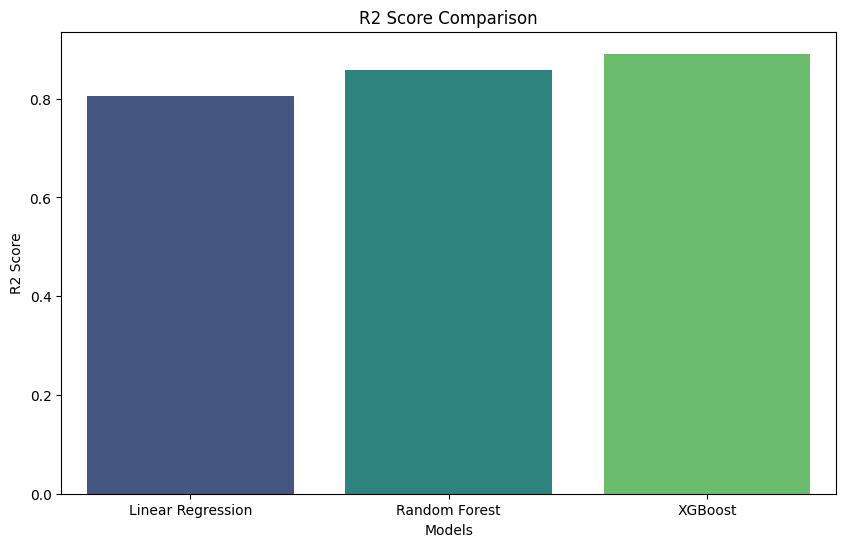

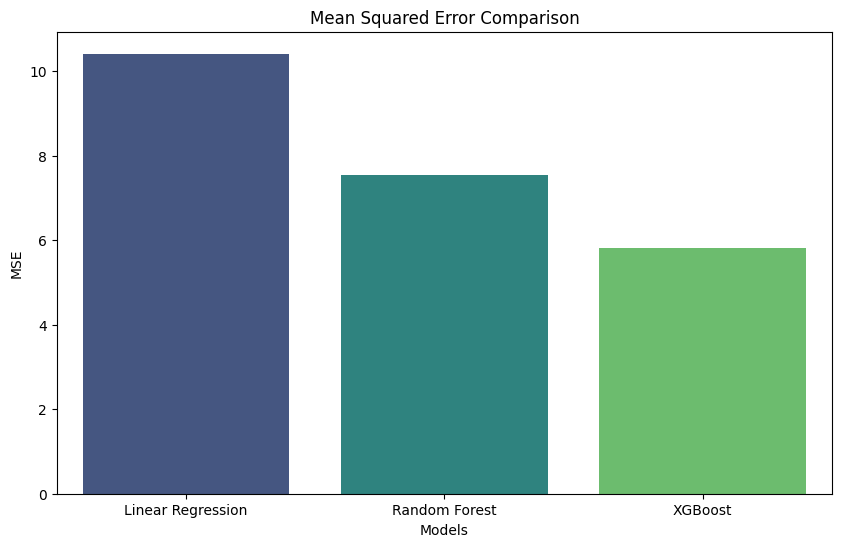

In [ ]:
# 시각화 - R2 비교
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["R2"], palette="viridis")
plt.title("R2 Score Comparison")
plt.ylabel("R2 Score")
plt.xlabel("Models")
plt.show()

# 시각화 - MSE 비교
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["MSE"], palette="viridis")
plt.title("Mean Squared Error Comparison")
plt.ylabel("MSE")
plt.xlabel("Models")
plt.show()

# 10) 모델 저장 및 로딩

In [ ]:
# -------------------------------
# 10. 모델 저장 및 로딩
# -------------------------------

In [ ]:
# 모델 저장
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')  # 모델 저장

print("모델이 'best_xgb_model.pkl'로 저장되었습니다.")

모델이 'best_xgb_model.pkl'로 저장되었습니다.


In [ ]:
# 모델 로드
loaded_model = joblib.load('best_xgb_model.pkl')  # 저장된 모델 불러오기

# 5. 불러온 모델로 예측 및 평가
y_pred = loaded_model.predict(X_test)

# 성능 평가 지표 계산
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# 결과 출력
print("XGBoost Results")
print(f"MSE: {mse_xgb:.4f}")
print(f"R2: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"MAPE: {mape_xgb:.2f}%")
print(f"Best Params: {xgb_grid.best_params_}")

XGBoost Results
MSE: 5.8138
R2: 0.8912
MAE: 1.7556
MAPE: 7.24%
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


# 추가) XGBoost 성능 높이기

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# 랜덤 서치용 파라미터 범위 설정
xgb_params = {
    "n_estimators": [i for i in range(100, 1100, 100)],  # 100부터 1100까지 100 단위로 확장
    "learning_rate": [0.01, 0.1],  # 학습률 확장
    "max_depth": [2,3,4,5,6],  # 깊이 확장
    "subsample": [0.7, 0.8, 1.0],  # 데이터 샘플링 비율 추가
    "colsample_bytree": [0.8, 1.0]  # 특성 샘플링 비율 추가
}

# XGBoost 모델 초기화
xgb_model = XGBRegressor(random_state=42, eval_metric="rmse", early_stopping_rounds=10) # 성능이 10 라운드 동안 개선되지 않으면 중단

# RandomizedSearchCV 초기화
random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=xgb_params,
                                   n_iter=50,
                                   cv=3,
                                   scoring='r2',
                                   random_state=42,
                                   n_jobs=-1
                                   )


random_search.fit(X_train, y_train,
                  eval_set=[(X_test, y_test)],
                  verbose=2
                  )

# 최적 모델 및 성능 출력
best_xgb_model = random_search.best_estimator_
best_xgb_model.set_params(n_estimators=xgb_grid.best_params_['n_estimators'])  # Best n_estimators 설정

# 예측
y_pred_xgb = best_xgb_model.predict(X_test)

# 성능 평가 지표 계산
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# 결과 출력
print("XGBoost Results with Early Stopping")
print(f"MSE: {mse_xgb:.4f}")
print(f"R2: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"MAPE: {mape_xgb:.2f}%")
print(f"Best Params: {xgb_grid.best_params_}")

[0]	validation_0-rmse:6.70708
[2]	validation_0-rmse:5.84271
[4]	validation_0-rmse:5.07437
[6]	validation_0-rmse:4.52744
[8]	validation_0-rmse:4.18403
[10]	validation_0-rmse:3.89502
[12]	validation_0-rmse:3.67965
[14]	validation_0-rmse:3.44502
[16]	validation_0-rmse:3.29783
[18]	validation_0-rmse:3.17176
[20]	validation_0-rmse:3.07225
[22]	validation_0-rmse:2.99358
[24]	validation_0-rmse:2.94417
[26]	validation_0-rmse:2.88437
[28]	validation_0-rmse:2.84786
[30]	validation_0-rmse:2.81199
[32]	validation_0-rmse:2.79040
[34]	validation_0-rmse:2.78096
[36]	validation_0-rmse:2.74683
[38]	validation_0-rmse:2.73835
[40]	validation_0-rmse:2.70955
[42]	validation_0-rmse:2.70169
[44]	validation_0-rmse:2.68211
[46]	validation_0-rmse:2.64569
[48]	validation_0-rmse:2.63166
[50]	validation_0-rmse:2.61844
[52]	validation_0-rmse:2.60213
[54]	validation_0-rmse:2.58771
[56]	validation_0-rmse:2.58072
[58]	validation_0-rmse:2.57385
[60]	validation_0-rmse:2.56950
[62]	validation_0-rmse:2.55533
[64]	validati

In [ ]:
# 추가) XGBoost 성능 높이기

# XGBoost 하이퍼파라미터 설정: n_estimators 범위 확장 및 추가 파라미터 조정
xgb_params = {
    "n_estimators": [i for i in range(100, 1100, 100)],  # 100부터 1000까지 100 단위로 확장
    "learning_rate": [0.01, 0.1],  # 학습률 확장
    "max_depth": [2,3,4,5,6],  # 깊이 확장
    "subsample": [0.7, 0.8, 1.0],  # 데이터 샘플링 비율 추가
    "colsample_bytree": [0.8, 1.0]  # 특성 샘플링 비율 추가
}

# XGBoost 모델 초기화
xgb_model = XGBRegressor(random_state=42, eval_metric="rmse", early_stopping_rounds=10) # 성능이 10 라운드 동안 개선되지 않으면 중단

# GridSearchCV로 하이퍼파라미터 튜닝
xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_params,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

# GridSearchCV 학습
xgb_grid.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],  # Early stopping을 위한 검증 데이터
    verbose=2
)

# 최적 모델 및 성능 출력
best_xgb_model = xgb_grid.best_estimator_
best_xgb_model.set_params(n_estimators=xgb_grid.best_params_['n_estimators'])  # Best n_estimators 설정

# 예측
y_pred_xgb = best_xgb_model.predict(X_test)

# 성능 평가 지표 계산
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# 결과 출력
print("XGBoost Results with Early Stopping")
print(f"MSE: {mse_xgb:.4f}")
print(f"R2: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"MAPE: {mape_xgb:.2f}%")
print(f"Best Params: {xgb_grid.best_params_}")

[0]	validation_0-rmse:6.70708
[2]	validation_0-rmse:5.84271
[4]	validation_0-rmse:5.07437
[6]	validation_0-rmse:4.52744
[8]	validation_0-rmse:4.18403
[10]	validation_0-rmse:3.89502
[12]	validation_0-rmse:3.67965
[14]	validation_0-rmse:3.44502
[16]	validation_0-rmse:3.29783
[18]	validation_0-rmse:3.17176
[20]	validation_0-rmse:3.07225
[22]	validation_0-rmse:2.99358
[24]	validation_0-rmse:2.94417
[26]	validation_0-rmse:2.88437
[28]	validation_0-rmse:2.84786
[30]	validation_0-rmse:2.81199
[32]	validation_0-rmse:2.79040
[34]	validation_0-rmse:2.78096
[36]	validation_0-rmse:2.74683
[38]	validation_0-rmse:2.73835
[40]	validation_0-rmse:2.70955
[42]	validation_0-rmse:2.70169
[44]	validation_0-rmse:2.68211
[46]	validation_0-rmse:2.64569
[48]	validation_0-rmse:2.63166
[50]	validation_0-rmse:2.61844
[52]	validation_0-rmse:2.60213
[54]	validation_0-rmse:2.58771
[56]	validation_0-rmse:2.58072
[58]	validation_0-rmse:2.57385
[60]	validation_0-rmse:2.56950
[62]	validation_0-rmse:2.55533
[64]	validati